In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('coalpublic2023.csv')

In [3]:
df.head()

,Year,MSHA ID,Mine Name,Mine State,Mine County,Mine Status,Mine Type,Company Type,Operation Type,Operating Company,Operating Company Address,Union Code,Coal Supply Region,Production (short tons),Average Employees,Labor Hours
0,2023,103540,Dodge Mine,Alabama,Cullman,Active,Surface,Independent Producer Operator,Preparation Plant,Southern Mineral Resources Llc,"1915 County Road 8, Hanceville, AL 35077",NaN,Appalachia Southern,0,7,"13,787"
1,2023,103489,John Poe Mine,Alabama,De Kalb,Permanently abandoned,Surface,Independent Producer Operator,Mine only,Kennedy Brothers Construction,"3024 Byler Road, Eldridge, AL 35554",NaN,Appalachia Southern,"8,477",3,978
2,2023,100329,Oak Grove Preparation Plant,Alabama,Jefferson,Active,Underground,Operating Subsidiary,Preparation Plant,Crimson Oak Grove Resources Ll,"8360 Taylors Ferry Rd, Hueytown, AL 35023",United Mine Workers Of America,Appalachia Southern,0,55,"1,25,108"
3,2023,100851,Oak Grove Mine,Alabama,Jefferson,Active,Underground,Operating Subsidiary,Mine only,Crimson Oak Grove Resources Ll,"8800 Oak Grove Mine Road, Adger, AL 35006",United Mine Workers Of America,Appalachia Southern,"25,49,279",507,"12,52,918"
4,2023,101401,No 7 Mine,Alabama,Jefferson,Active,Underground,Independent Producer Operator,Mine and Preparation Plant,"Warrior Met Coal Mining, Llc","P.O. Box 133, Brookwood, AL 35444",United Mine Workers Of America,Appalachia Southern,"51,41,323",558,"16,11,127"


In [4]:
df.shape

(815, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 815 entries, 0 to 814
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Year                       815 non-null    int64 
 1   MSHA ID                    815 non-null    int64 
 2   Mine Name                  815 non-null    object
 3   Mine State                 815 non-null    object
 4   Mine County                815 non-null    object
 5   Mine Status                815 non-null    object
 6   Mine Type                  815 non-null    object
 7   Company Type               815 non-null    object
 8   Operation Type             815 non-null    object
 9   Operating Company          815 non-null    object
 10  Operating Company Address  815 non-null    object
 11  Union Code                 43 non-null     object
 12  Coal Supply Region         815 non-null    object
 13  Production (short tons)    815 non-null    object
 14  Average Em

In [6]:
df.isnull().sum()

Year                           0
MSHA ID                        0
Mine Name                      0
Mine State                     0
Mine County                    0
Mine Status                    0
Mine Type                      0
Company Type                   0
Operation Type                 0
Operating Company              0
Operating Company Address      0
Union Code                   772
Coal Supply Region             0
Production (short tons)        0
Average Employees              0
Labor Hours                    0
dtype: int64

In [7]:
df.describe()

,Year,MSHA ID
count,815.0,8.150000e+02
mean,2023.0,3.230137e+06
std,0.0,1.453518e+06
min,2023.0,1.003290e+05
25%,2023.0,1.519833e+06
50%,2023.0,3.609394e+06
75%,2023.0,4.607448e+06
max,2023.0,5.000030e+06


In [8]:
df.describe(include='object')

,Mine Name,Mine State,Mine County,Mine Status,Mine Type,Company Type,Operation Type,Operating Company,Operating Company Address,Union Code,Coal Supply Region,Production (short tons),Average Employees,Labor Hours
count,815,815,815,815,815,815,815,815,815,43,815,815,815,815
unique,724,26,126,4,3,3,3,449,483,5,8,560,178,790
top,Rausch Creek Coal Preparation,West Virginia (Southern),Pike,Active,Surface,Independent Producer Operator,Mine only,Rosebud Mining Company,"301 Market Street, Kittanning, PA 16201",United Mine Workers Of America,Appalachia Central,0,2,"3,407"
freq,4,226,46,636,494,539,509,25,22,35,459,255,44,3


In [9]:
df['Average Employees'] = df['Average Employees'].str.replace(',', '').astype(float)
df['Labor Hours'] = df['Labor Hours'].str.replace(',', '').astype(float)
df['Production (short tons)'] = df['Production (short tons)'].str.replace(',', '').astype(float)

In [10]:
df.describe()

,Year,MSHA ID,Production (short tons),Average Employees,Labor Hours
count,815.0,8.150000e+02,8.150000e+02,815.000000,8.150000e+02
mean,2023.0,3.230137e+06,7.091460e+05,55.798773,1.253910e+05
std,0.0,1.453518e+06,3.556094e+06,117.561584,2.705645e+05
min,2023.0,1.003290e+05,0.000000e+00,0.000000,1.200000e+02
25%,2023.0,1.519833e+06,0.000000e+00,6.000000,9.670500e+03
50%,2023.0,3.609394e+06,2.626900e+04,15.000000,2.979200e+04
75%,2023.0,4.607448e+06,1.915555e+05,43.000000,1.005060e+05
max,2023.0,5.000030e+06,6.201897e+07,1120.000000,2.343595e+06


In [38]:
df.describe(include='object')

,Mine Name,Mine State,Mine County,Mine Status,Mine Type,Company Type,Operation Type,Operating Company,Operating Company Address,Union Code,Coal Supply Region
count,560,560,560,560,560,560,560,560,560,28,560
unique,551,25,118,4,3,3,2,368,390,5,8
top,Mine No. 1,West Virginia (Southern),Pike,Active,Surface,Independent Producer Operator,Mine only,Rosebud Mining Company,"301 Market Street, Kittanning, PA 16201",United Mine Workers Of America,Appalachia Central
freq,3,150,32,422,362,386,509,18,16,20,302


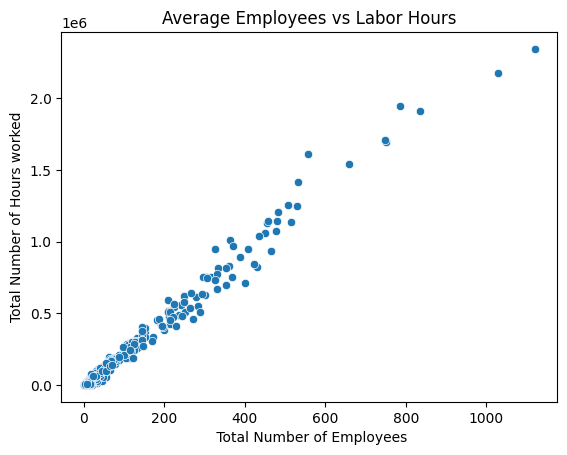

In [11]:
sns.scatterplot(data=df, x='Average Employees', y='Labor Hours')
plt.xlabel(' Total Number of Employees')
plt.ylabel('Total Number of Hours worked')
plt.title('Average Employees vs Labor Hours')
plt.show()

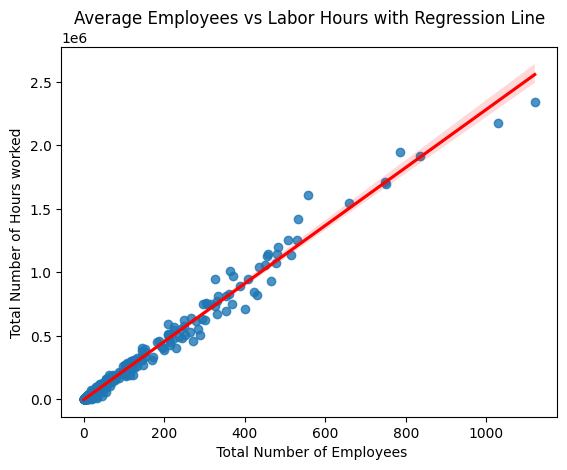

In [12]:
sns.regplot(data=df, x='Average Employees', y='Labor Hours', scatter=True, line_kws={"color": "red"})
plt.xlabel(' Total Number of Employees')
plt.ylabel('Total Number of Hours worked')
plt.title('Average Employees vs Labor Hours with Regression Line')
plt.show()

In [13]:
df = df[df['Production (short tons)'] > 0]

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 560 entries, 1 to 814
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year                       560 non-null    int64  
 1   MSHA ID                    560 non-null    int64  
 2   Mine Name                  560 non-null    object 
 3   Mine State                 560 non-null    object 
 4   Mine County                560 non-null    object 
 5   Mine Status                560 non-null    object 
 6   Mine Type                  560 non-null    object 
 7   Company Type               560 non-null    object 
 8   Operation Type             560 non-null    object 
 9   Operating Company          560 non-null    object 
 10  Operating Company Address  560 non-null    object 
 11  Union Code                 28 non-null     object 
 12  Coal Supply Region         560 non-null    object 
 13  Production (short tons)    560 non-null    float64
 14 

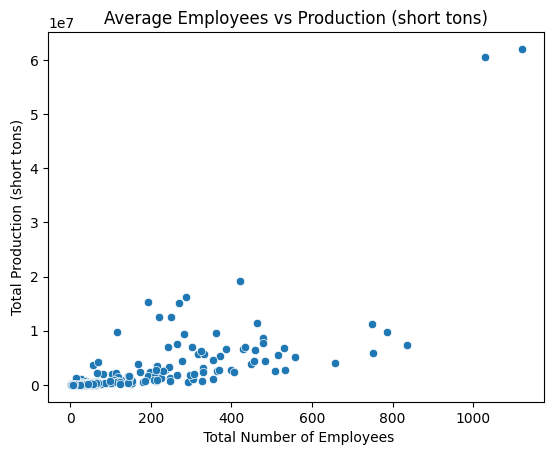

In [15]:
sns.scatterplot(data=df, x='Average Employees', y='Production (short tons)')
plt.xlabel(' Total Number of Employees')
plt.ylabel('Total Production (short tons)')
plt.title('Average Employees vs Production (short tons)')
plt.show()

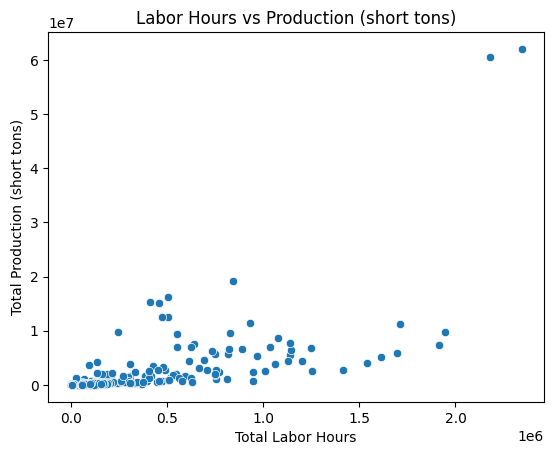

In [16]:
sns.scatterplot(data=df, x='Labor Hours', y='Production (short tons)')
plt.xlabel('Total Labor Hours')
plt.ylabel('Total Production (short tons)')
plt.title('Labor Hours vs Production (short tons)')
plt.show()

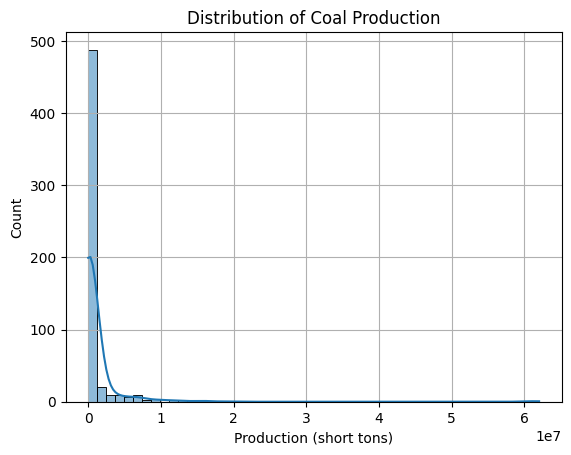

In [17]:
sns.histplot(df['Production (short tons)'], bins=50, kde=True)
plt.title("Distribution of Coal Production")
plt.xlabel("Production (short tons)")
plt.grid()
plt.show()

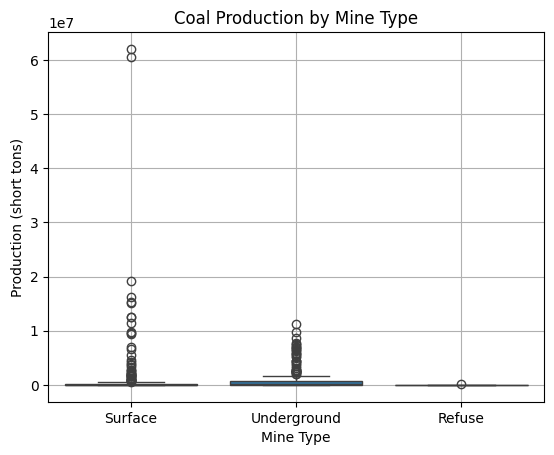

In [18]:
sns.boxplot(x='Mine Type', y='Production (short tons)', data=df)
plt.title("Coal Production by Mine Type")
plt.grid()
plt.show()

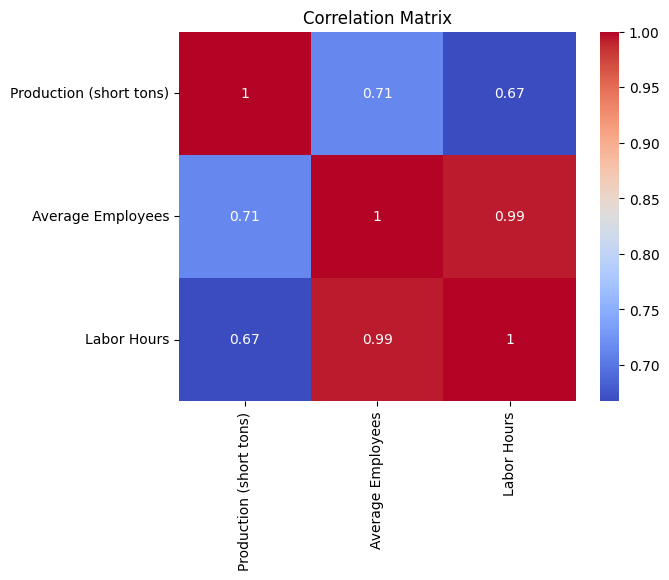

In [19]:
numerical_cols = ['Production (short tons)', 'Average Employees', 'Labor Hours']
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [20]:
df.loc[:,'Tons per Employee'] = df['Production (short tons)'] / df['Average Employees']
df.loc[:,'Tons per Labor Hour'] = df['Production (short tons)'] / df['Labor Hours']

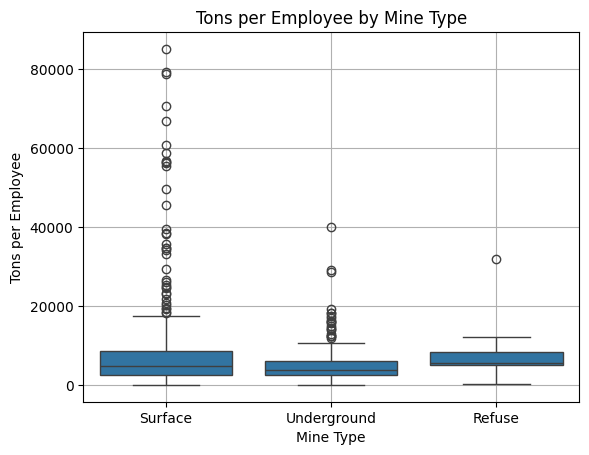

In [21]:
sns.boxplot(x='Mine Type', y='Tons per Employee', data=df)
plt.title("Tons per Employee by Mine Type")
plt.grid()
plt.show()

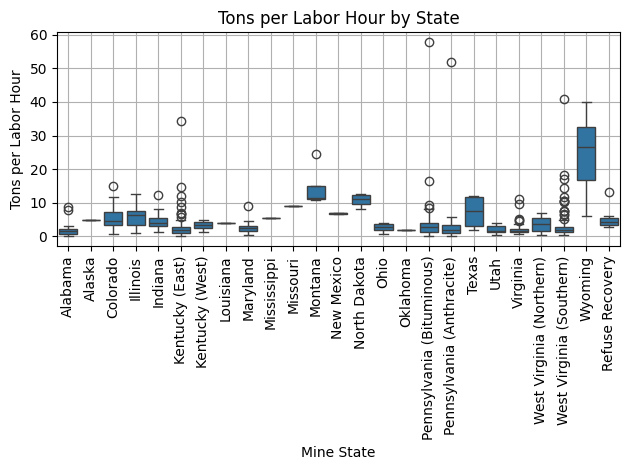

In [22]:
sns.boxplot(x='Mine State', y='Tons per Labor Hour', data=df)
plt.xticks(rotation=90)
plt.title("Tons per Labor Hour by State")
plt.grid()
plt.tight_layout()
plt.show()

In [28]:
df.loc[:,"log_production"]= np.log1p(df['Production (short tons)'])

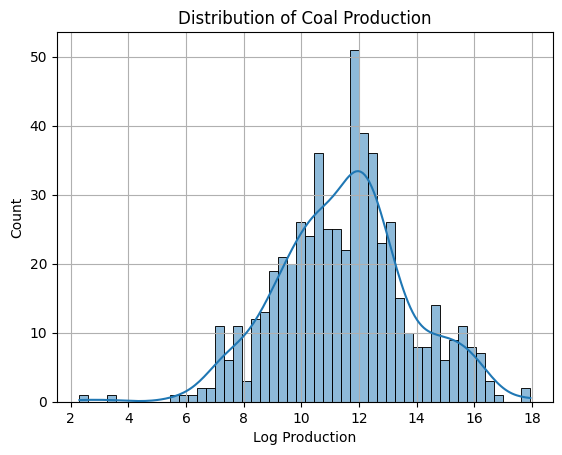

In [30]:
sns.histplot(df['log_production'], bins=50, kde=True)
plt.title("Distribution of Coal Production")
plt.xlabel("Log Production")
plt.grid()
plt.show()

In [33]:
df.groupby('Mine Status')['Production (short tons)'].mean().sort_values(ascending=False)

Mine Status
Active                                1.337821e+06
Active, men working, not producing    1.432219e+05
Permanently abandoned                 6.217474e+04
Temporarily closed                    3.023494e+04
Name: Production (short tons), dtype: float64

In [40]:
df['Mine Status'].value_counts()

Mine Status
Active                                422
Active, men working, not producing     72
Permanently abandoned                  34
Temporarily closed                     32
Name: count, dtype: int64

In [ ]:
df.groupby('Mine Type')['Production (short tons)'].mean().sort_values(ascending=False)

Mine Type
Underground    1.147001e+06
Surface        9.937215e+05
Refuse         3.707050e+04
Name: Production (short tons), dtype: float64

In [36]:
df.groupby('Company Type')['Production (short tons)'].mean().sort_values(ascending=False)

Company Type
Operating Subsidiary             2.924431e+06
Independent Producer Operator    2.568643e+05
Contractor                       1.929157e+05
Name: Production (short tons), dtype: float64

In [37]:
df.groupby('Operation Type')['Production (short tons)'].mean().sort_values(ascending=False)

Operation Type
Mine and Preparation Plant    6.569489e+06
Mine only                     4.772300e+05
Name: Production (short tons), dtype: float64

In [43]:
features = ['Mine State','Mine Status', 'Mine Type', 'Company Type', 'Operation Type', 
            'Coal Supply Region', 'Average Employees', 'Labor Hours']

In [55]:
X = df[features]
y = df['log_production']

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
categorical_features = ['Mine State', 'Mine Status', 'Mine Type', 'Company Type',
                        'Operation Type', 'Coal Supply Region']
numeric_features = ['Average Employees', 'Labor Hours']

In [58]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [59]:
preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
    ('num', 'passthrough', numeric_features)
])

In [60]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor

In [61]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

In [62]:
model.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...), ('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [63]:
y_pred_log = model.predict(X_test)
y_pred = np.expm1(y_pred_log)
y_test_actual = np.expm1(y_test)

In [64]:
rmse = np.sqrt(np.mean((y_pred - y_test_actual) ** 2))
print(f"Root Mean Squared Error: {rmse:.2f}")

Root Mean Squared Error: 3475399.05


In [78]:
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error, mean_squared_error

In [73]:
r2 = r2_score(y_test_actual, y_pred)
print(f"R^2 Score: {r2:.2f}")

R^2 Score: 0.69


In [74]:
explained_variance = explained_variance_score(y_test_actual, y_pred)
print(f"Explained Variance Score: {explained_variance:.2f}")

Explained Variance Score: 0.70


In [75]:
mae = mean_absolute_error(y_test_actual, y_pred)
print(f"Mean Absolute Error: {mae:.2f}")

Mean Absolute Error: 675261.44


In [76]:
mse = mean_squared_error(y_test_actual, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

Mean Squared Error: 12078398545292.44


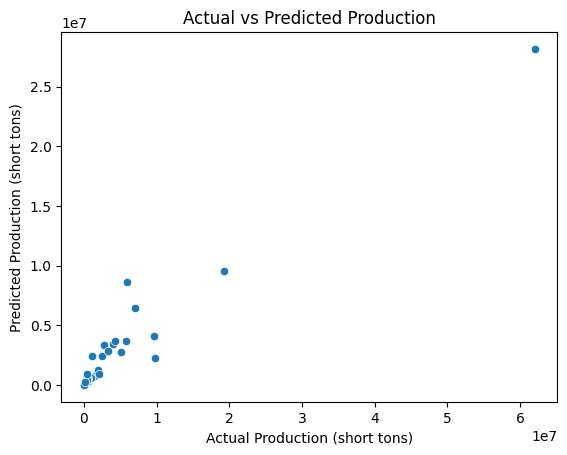

In [68]:
sns.scatterplot(x=y_test_actual, y=y_pred)
plt.xlabel('Actual Production (short tons)')
plt.ylabel('Predicted Production (short tons)')
plt.title('Actual vs Predicted Production')
plt.show()

In [69]:
importances = model.named_steps['regressor'].feature_importances_
feature_names = preprocessor.get_feature_names_out()
feat_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)

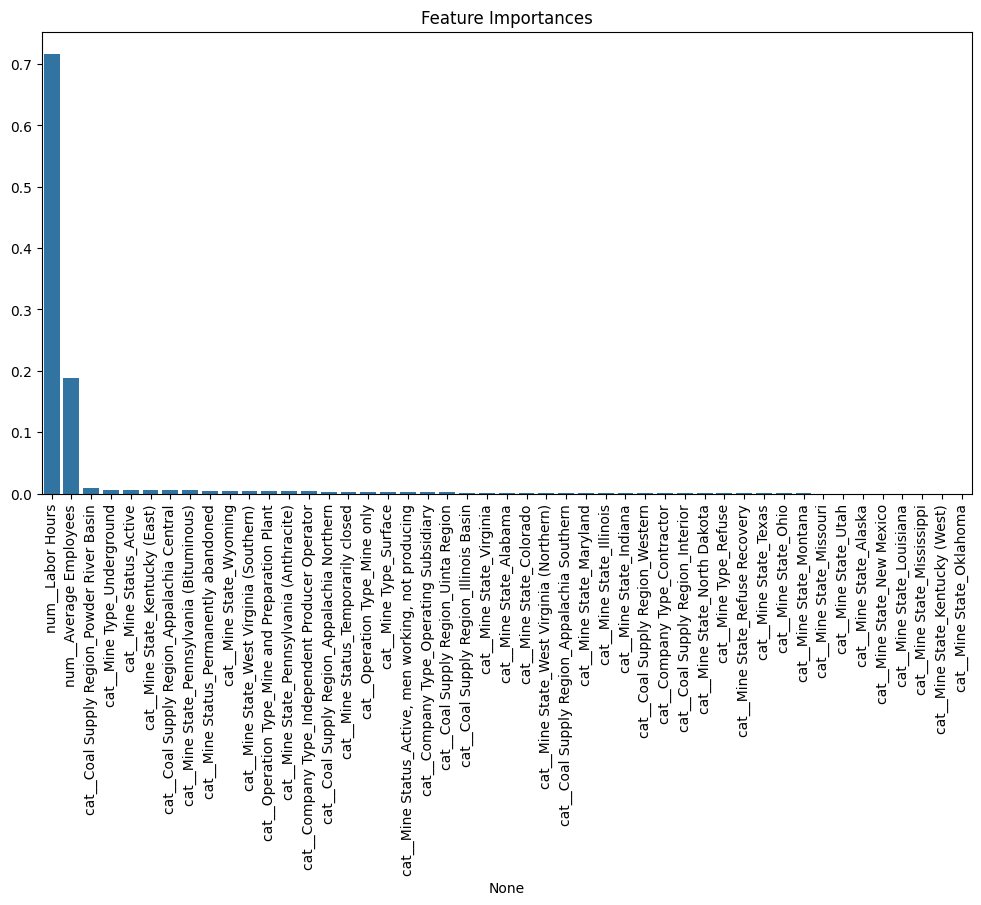

In [99]:
plt.figure(figsize=(12, 6))
sns.barplot(x=feat_importances.index, y=feat_importances.values)
plt.xticks(rotation=90)
plt.title('Feature Importances')
plt.show()

In [79]:
from xgboost import XGBRegressor

In [80]:
pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(random_state=42))
])

In [81]:
from scipy.stats import randint, uniform

In [82]:
param_distributions = {
    'regressor__n_estimators': randint(100, 500),
    'regressor__learning_rate': uniform(0.01, 0.2),
    'regressor__max_depth': randint(3, 10),
    'regressor__subsample': uniform(0.7, 0.3),
    'regressor__colsample_bytree': uniform(0.7, 0.3)
}

In [83]:
from sklearn.model_selection import RandomizedSearchCV

In [84]:
search = RandomizedSearchCV(
    pipe, param_distributions=param_distributions,
    n_iter=50, cv=5, scoring='r2',verbose=1, random_state=42, n_jobs=-1
)
search.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


,estimator,"Pipeline(step...=None, ...))])"
,param_distributions,"{'regressor__colsample_bytree': <scipy.stats....001E49098EB40>, 'regressor__learning_rate': <scipy.stats....001E4909A1460>, 'regressor__max_depth': <scipy.stats....001E48F9252B0>, 'regressor__n_estimators': <scipy.stats....001E48EBCD2B0>, ...}"
,n_iter,50
,scoring,'r2'
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [85]:
y_xg_log = search.best_estimator_.predict(X_test)
y_xg = np.expm1(y_xg_log)
y_test_actual = np.expm1(y_test)

In [92]:
print(f"Best parameters: {search.best_params_}")

Best parameters: {'regressor__colsample_bytree': np.float64(0.7358782737814905), 'regressor__learning_rate': np.float64(0.15264895744459903), 'regressor__max_depth': 3, 'regressor__n_estimators': 104, 'regressor__subsample': np.float64(0.8683831592708489)}


In [86]:
rmse_xg = np.sqrt(np.mean((y_xg - y_test_actual) ** 2))
print(f"Root Mean Squared Error (XGBoost): {rmse_xg:.2f}")

Root Mean Squared Error (XGBoost): 2645375.51


In [87]:
r2_xg = r2_score(y_test_actual, y_xg)
print(f"R^2 Score (XGBoost): {r2_xg:.2f}")

R^2 Score (XGBoost): 0.82


In [88]:
explained_variance_xg = explained_variance_score(y_test_actual, y_xg)
print(f"Explained Variance Score (XGBoost): {explained_variance_xg:.2f}")

Explained Variance Score (XGBoost): 0.83


In [89]:
mae_xg = mean_absolute_error(y_test_actual, y_xg)
print(f"Mean Absolute Error (XGBoost): {mae_xg:.2f}")

Mean Absolute Error (XGBoost): 525879.02


In [90]:
mse_xg = mean_squared_error(y_test_actual, y_xg)
print(f"Mean Squared Error (XGBoost): {mse_xg:.2f}")

Mean Squared Error (XGBoost): 6998011611309.66


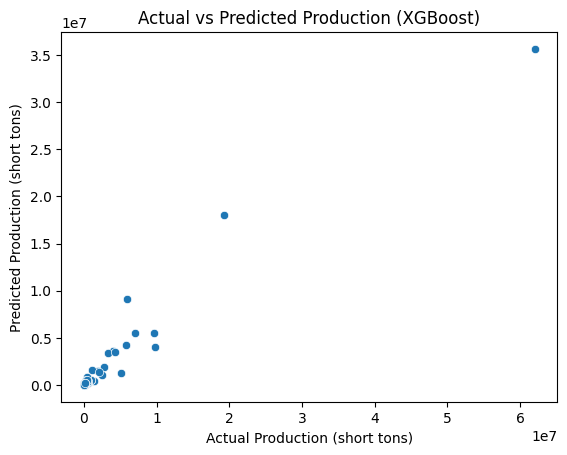

In [91]:
sns.scatterplot(x=y_test_actual, y=y_xg)
plt.xlabel('Actual Production (short tons)')
plt.ylabel('Predicted Production (short tons)')
plt.title('Actual vs Predicted Production (XGBoost)')
plt.show()

In [94]:
importances_xg = search.best_estimator_.named_steps['regressor'].feature_importances_
feature_names_xg = search.best_estimator_.named_steps['preprocessor'].get_feature_names_out()
feat_importances_xg = pd.Series(importances_xg, index=feature_names_xg).sort_values(ascending=False)

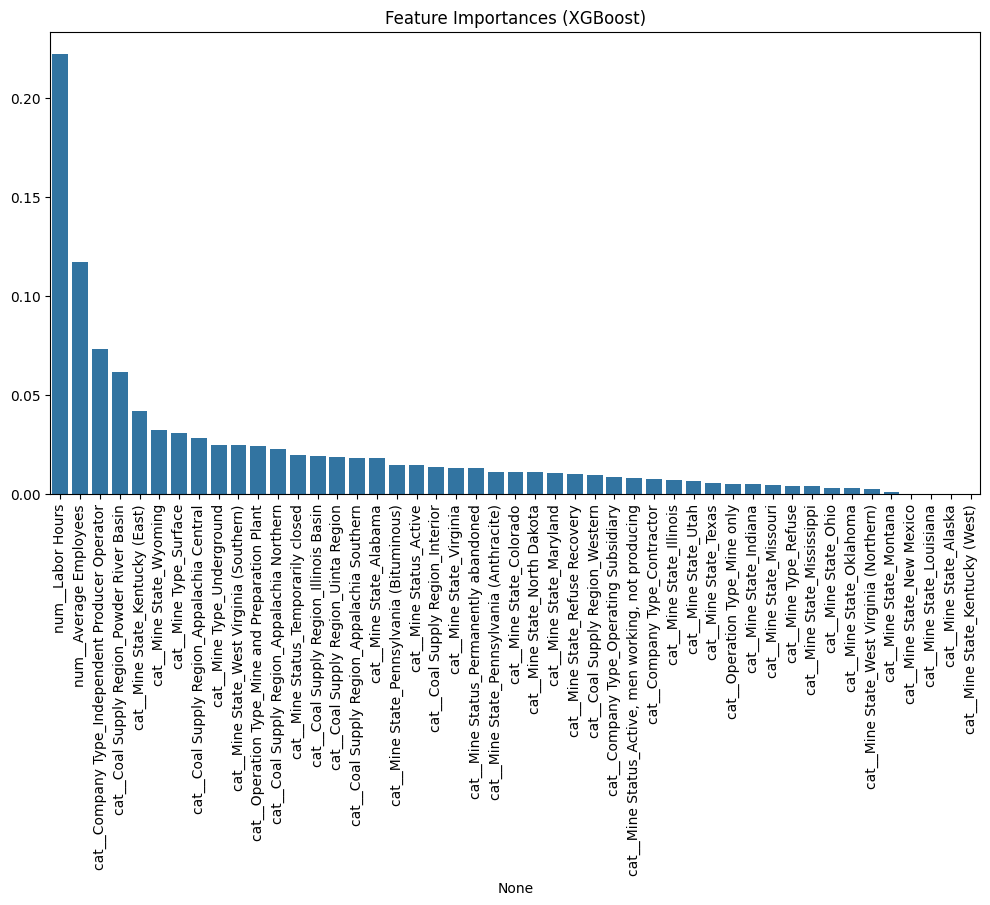

In [98]:
plt.figure(figsize=(12, 6))
sns.barplot(x=feat_importances_xg.index, y=feat_importances_xg.values)
plt.xticks(rotation=90)
plt.title('Feature Importances (XGBoost)')
plt.show()